# V3: Adding T-score



In [17]:
#Load

from bs4 import BeautifulSoup
import time
import requests     # to get images
import shutil       # to save files locally
import datetime
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import datetime
from scipy.stats import norm
import xgboost
from xgboost import XGBClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN
import random
from random import randint
from sklearn.datasets import *
from IPython.display import Image, display_svg, SVG
import os
from dtreeviz.trees import *
from sklearn.tree import plot_tree

In [18]:
df = pd.read_excel('data_outputs\\advancedboxes_5years_XCEL_EDIT.xlsx')

In [19]:
df['Hm_Date_id'] =  df['Hm_Date_id'].astype(str).str.replace('_','-')
df['Hm_Date_id'] =  df['Hm_Date_id'].astype(str).str.replace('/','-')
df

,Unnamed: 0,Team,Match Up,Home_team,Away_team,GameDate,Hm_Date_id,W/L,MIN,OffRtg,...,avgOPP_AST/TO,avgOPP_Ast_ratio,avgOPP_OREB%,avgOPP_DREB%,avgOPP_REB%,avgOPP_TOV%,avgOPP_eFG%,avgOPP_TS%,avgOPP_PACE,avgOPP_PIE
0,1,CLE,CLE vs. MIL,CLE,MIL,04/10/2022,CLE-04-10-2022,W,48,127.9,...,1.95,17.33,26.98,74.87,51.34,13.22,54.74,58.11,100.49,51.74
1,2,LAL,LAL @ DEN,DEN,LAL,04/10/2022,DEN-04-10-2022,W,53,129.2,...,2.12,19.93,26.79,75.35,51.52,14.49,55.63,59.03,98.33,51.41
2,3,UTA,UTA @ POR,POR,UTA,04/10/2022,POR-04-10-2022,W,48,112.1,...,1.70,16.91,26.64,72.06,48.49,14.70,51.43,54.89,98.61,44.40
3,4,SAC,SAC @ PHX,PHX,SAC,04/10/2022,PHX-04-10-2022,W,48,117.2,...,2.30,19.42,26.26,72.67,50.31,12.79,55.12,58.31,100.22,55.17
4,5,DAL,DAL vs. SAS,DAL,SAS,04/10/2022,DAL-04-10-2022,W,48,130.0,...,2.39,19.40,27.94,71.27,49.36,12.54,52.78,55.69,100.54,50.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11653,11654,IND,IND vs. BKN,IND,BKN,10/18/2017,IND-10-18-2017,W,48,119.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11654,11655,CLE,CLE vs. BOS,CLE,BOS,10/17/2017,CLE-10-17-2017,W,48,104.1,...,2.00,17.90,23.20,77.10,48.10,12.10,45.50,50.00,98.50,50.90
11655,11656,BOS,BOS @ CLE,CLE,BOS,10/17/2017,CLE-10-17-2017,L,48,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11656,11657,HOU,HOU @ GSW,GSW,HOU,10/17/2017,GSW-10-17-2017,W,48,120.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df['Hm_Date_id'].dtypes

dtype('O')

In [21]:
all_games_starters = pd.read_excel('C:\\Users\\tmcro\\OneDrive\\0_NBA_Statistitcs_2021\\NBA Current Studies\\Flatiron Phase 3 Project\\starters_by_game\\all_games_starters_by_game - Copy.xlsx', sheet_name= [0,1])
last_or_avg = all_games_starters[1]

In [22]:
last_or_avg

,Unnamed: 0,game_id,data_set,Season,date,a1,a2,a3,a4,a5,...,a5_tScore,h1_tScore,h2_tScore,h3_tScore,h4_tScore,h5_tScore,Away_Team_T_Score,Home_Team_T_Score,net_t_score,net_t_score_winnerpick
0,0,22100001,2021-22 Regular Season,2021,10/19/2021,Nic Claxton,Kevin Durant,Blake Griffin,James Harden,Joe Harris,...,6.624,5.546,6.922000,7.544,6.402,7.392,30.140000,33.806000,3.666000,MIL
1,1,22100002,2021-22 Regular Season,2021,10/19/2021,Kevon Looney,Stephen Curry,Jordan Poole,Andrew Wiggins,Draymond Green,...,5.642,5.120,6.858000,8.286,4.414,4.744,32.342000,29.422000,2.920000,GSW
2,2,22100003,2021-22 Regular Season,2021,10/20/2021,Myles Turner,Malcolm Brogdon,Domantas Sabonis,Justin Holiday,Chris Duarte,...,6.630,5.158,6.302000,6.444,7.070,4.734,29.928000,29.708000,0.220000,IND
3,3,22100004,2021-22 Regular Season,2021,10/20/2021,Nikola Vucevic,Lonzo Ball,DeMar DeRozan,Zach LaVine,Patrick Williams,...,5.052,4.958,4.280000,4.300,6.322,6.060,31.052000,25.920000,5.132000,CHI
4,4,22100005,2021-22 Regular Season,2021,10/20/2021,Robert Williams III,Grant Williams,Jayson Tatum,Marcus Smart,Jaylen Brown,...,6.938,4.796,4.868000,6.084,6.700,5.740,33.164000,28.188000,4.976000,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,1307,41700317,2018 Playoff,2018,5/28/2018,Kevin Durant,Draymond Green,Kevon Looney,Klay Thompson,Stephen Curry,...,7.764,5.740,NaN,6.368,7.146,7.584,34.799000,NaN,NaN,NaN
6210,1308,41700401,2018 Playoff,2018,5/31/2018,LeBron James,Kevin Love,Tristan Thompson,JR Smith,George Hill,...,6.156,8.618,5.254000,4.790,8.373,7.764,31.173333,34.799000,3.625667,GSW
6211,1309,41700402,2018 Playoff,2018,6/3/2018,LeBron James,Kevin Love,Tristan Thompson,JR Smith,George Hill,...,6.156,8.618,5.254000,4.174,8.373,7.764,31.173333,34.183000,3.009667,GSW
6212,1310,41700403,2018 Playoff,2018,6/6/2018,Kevin Durant,Draymond Green,JaVale McGee,Klay Thompson,Stephen Curry,...,7.764,8.296,6.551333,4.152,6.018,6.156,34.183000,31.173333,3.009667,GSW


In [23]:
#Identify columns with missing values
nothere = last_or_avg.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0
a1_tScore,1418
a2_tScore,1418
a3_tScore,1367
a4_tScore,1332
a5_tScore,1317
h1_tScore,1429
h2_tScore,1404
h3_tScore,1354
h4_tScore,1302
h5_tScore,1311


In [16]:
all_games_starters.columns

AttributeError: 'dict' object has no attribute 'columns'

### ADD OTHER YEARS IN HERE

In [24]:
df2 = pd.merge(df, last_or_avg, left_on= 'Hm_Date_id', right_on = 'hm_date_id', how = 'left' )
df2

,Unnamed: 0_x,Team,Match Up,Home_team_x,Away_team_x,GameDate,Hm_Date_id,W/L,MIN,OffRtg,...,a5_tScore,h1_tScore,h2_tScore,h3_tScore,h4_tScore,h5_tScore,Away_Team_T_Score,Home_Team_T_Score,net_t_score,net_t_score_winnerpick
0,1,CLE,CLE vs. MIL,CLE,MIL,04/10/2022,CLE-04-10-2022,W,48,127.9,...,6.244,5.074,6.556,5.914,4.866,7.348,NaN,29.758,NaN,NaN
1,2,LAL,LAL @ DEN,DEN,LAL,04/10/2022,DEN-04-10-2022,W,53,129.2,...,6.438,5.666,4.178,5.318,5.430,6.216,NaN,26.808,NaN,NaN
2,3,UTA,UTA @ POR,POR,UTA,04/10/2022,POR-04-10-2022,W,48,112.1,...,6.016,NaN,NaN,NaN,4.554,3.386,26.378,NaN,NaN,NaN
3,4,SAC,SAC @ PHX,PHX,SAC,04/10/2022,PHX-04-10-2022,W,48,117.2,...,6.216,4.124,7.436,7.664,6.146,6.394,26.354,31.764,5.410,PHX
4,5,DAL,DAL vs. SAS,DAL,SAS,04/10/2022,DAL-04-10-2022,W,48,130.0,...,5.774,5.072,5.622,6.852,6.150,6.870,30.024,30.566,0.542,DAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11653,11654,IND,IND vs. BKN,IND,BKN,10/18/2017,IND-10-18-2017,W,48,119.7,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,IND
11654,11655,CLE,CLE vs. BOS,CLE,BOS,10/17/2017,CLE-10-17-2017,W,48,104.1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,CLE
11655,11656,BOS,BOS @ CLE,CLE,BOS,10/17/2017,CLE-10-17-2017,L,48,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,CLE
11656,11657,HOU,HOU @ GSW,GSW,HOU,10/17/2017,GSW-10-17-2017,W,48,120.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,GSW


In [25]:
#Identify columns with missing values
nothere = df2.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0
avgT1_OffRtg,31
avgT1_DefRtg,31
avgT1_NetRtg,31
avgT1_AST%,31
avgT1_AST/TO,31
...,...
h5_tScore,2624
Away_Team_T_Score,1178
Home_Team_T_Score,1114
net_t_score,2112


In [26]:
df = df2

In [27]:
df['win?'] = np.where(df['W/L'] == 'W', 1, 0)
df

,Unnamed: 0_x,Team,Match Up,Home_team_x,Away_team_x,GameDate,Hm_Date_id,W/L,MIN,OffRtg,...,h1_tScore,h2_tScore,h3_tScore,h4_tScore,h5_tScore,Away_Team_T_Score,Home_Team_T_Score,net_t_score,net_t_score_winnerpick,win?
0,1,CLE,CLE vs. MIL,CLE,MIL,04/10/2022,CLE-04-10-2022,W,48,127.9,...,5.074,6.556,5.914,4.866,7.348,NaN,29.758,NaN,NaN,1
1,2,LAL,LAL @ DEN,DEN,LAL,04/10/2022,DEN-04-10-2022,W,53,129.2,...,5.666,4.178,5.318,5.430,6.216,NaN,26.808,NaN,NaN,1
2,3,UTA,UTA @ POR,POR,UTA,04/10/2022,POR-04-10-2022,W,48,112.1,...,NaN,NaN,NaN,4.554,3.386,26.378,NaN,NaN,NaN,1
3,4,SAC,SAC @ PHX,PHX,SAC,04/10/2022,PHX-04-10-2022,W,48,117.2,...,4.124,7.436,7.664,6.146,6.394,26.354,31.764,5.410,PHX,1
4,5,DAL,DAL vs. SAS,DAL,SAS,04/10/2022,DAL-04-10-2022,W,48,130.0,...,5.072,5.622,6.852,6.150,6.870,30.024,30.566,0.542,DAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11653,11654,IND,IND vs. BKN,IND,BKN,10/18/2017,IND-10-18-2017,W,48,119.7,...,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,IND,1
11654,11655,CLE,CLE vs. BOS,CLE,BOS,10/17/2017,CLE-10-17-2017,W,48,104.1,...,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,CLE,1
11655,11656,BOS,BOS @ CLE,CLE,BOS,10/17/2017,CLE-10-17-2017,L,48,100.0,...,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,CLE,0
11656,11657,HOU,HOU @ GSW,GSW,HOU,10/17/2017,GSW-10-17-2017,W,48,120.8,...,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,GSW,1


In [28]:
df.dropna(inplace = True)
df

,Unnamed: 0_x,Team,Match Up,Home_team_x,Away_team_x,GameDate,Hm_Date_id,W/L,MIN,OffRtg,...,h1_tScore,h2_tScore,h3_tScore,h4_tScore,h5_tScore,Away_Team_T_Score,Home_Team_T_Score,net_t_score,net_t_score_winnerpick,win?
3,4,SAC,SAC @ PHX,PHX,SAC,04/10/2022,PHX-04-10-2022,W,48,117.2,...,4.124,7.436,7.664,6.146,6.394,26.354,31.764,5.410,PHX,1
4,5,DAL,DAL vs. SAS,DAL,SAS,04/10/2022,DAL-04-10-2022,W,48,130.0,...,5.072,5.622,6.852,6.150,6.870,30.024,30.566,0.542,DAL,1
5,6,WAS,WAS @ CHA,CHA,WAS,04/10/2022,CHA-04-10-2022,L,48,108.0,...,5.158,6.444,7.070,6.426,5.946,23.296,31.044,7.748,CHA,0
7,8,HOU,HOU vs. ATL,HOU,ATL,04/10/2022,HOU-04-10-2022,L,48,116.3,...,3.596,5.754,5.062,5.874,5.132,29.746,25.418,4.328,ATL,0
8,9,CHI,CHI @ MIN,MIN,CHI,04/10/2022,MIN-04-10-2022,W,48,120.4,...,4.584,6.090,6.246,5.972,4.802,23.862,27.694,3.832,MIN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,9189,ORL,ORL vs. MIA,ORL,MIA,10/17/2018,ORL-10-17-2018,W,48,101.0,...,5.884,5.914,5.972,5.930,6.170,25.274,29.870,4.596,ORL,1
9190,9191,MIL,MIL @ CHA,CHA,MIL,10/17/2018,CHA-10-17-2018,W,48,109.7,...,6.422,5.953,5.222,5.540,6.292,31.114,29.429,1.685,MIL,1
9192,9193,UTA,UTA @ SAC,SAC,UTA,10/17/2018,SAC-10-17-2018,W,48,115.0,...,7.552,6.456,6.424,5.624,5.952,30.102,32.008,1.906,SAC,1
9195,9196,PHI,PHI @ BOS,BOS,PHI,10/16/2018,BOS-10-16-2018,L,48,82.1,...,5.708,6.272,5.550,6.072,7.550,29.100,31.152,2.052,BOS,0


## 1. Project Overview:
Solve for single game NBA wins

## Define Target Variable

In this case, the target variable is whether or not an individual had heart disease. 

In [29]:
target = ['win?']

## Define Scoring Metric

options: https://scikit-learn.org/stable/modules/model_evaluation.html


Accuracy!


In [30]:
class_metric = 'accuracy'

In [31]:
# Describe Data
df.describe().round(2)

,Unnamed: 0_x,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,ASTRatio,OREB%,DREB%,...,a5_tScore,h1_tScore,h2_tScore,h3_tScore,h4_tScore,h5_tScore,Away_Team_T_Score,Home_Team_T_Score,net_t_score,win?
count,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,...,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.0
mean,4300.80,48.33,110.61,110.61,0.00,60.19,1.92,17.72,26.63,73.37,...,6.04,5.64,5.97,5.82,6.14,6.02,29.56,29.58,3.14,0.5
std,2523.86,1.43,11.33,11.33,14.72,9.50,0.79,3.02,6.84,6.84,...,1.11,1.21,1.06,1.13,1.10,1.13,2.82,2.83,2.47,0.5
min,4.00,48.00,67.30,67.30,-74.50,27.00,0.42,6.30,4.30,48.80,...,2.33,2.38,2.33,2.33,2.47,2.33,17.04,17.04,0.00,0.0
25%,2166.25,48.00,103.00,103.00,-9.40,53.80,1.39,15.60,21.80,68.80,...,5.17,4.92,5.23,4.99,5.47,5.16,27.84,27.98,1.18,0.0
50%,4199.50,48.00,110.70,110.70,0.00,60.50,1.76,17.70,26.50,73.50,...,6.16,5.74,5.99,5.84,6.25,6.17,29.86,29.87,2.61,0.5
75%,6216.50,48.00,118.10,118.10,9.40,66.70,2.25,19.70,31.30,78.20,...,6.87,6.39,6.72,6.68,6.88,6.86,31.39,31.37,4.59,1.0
max,9198.00,68.00,155.10,155.10,74.50,89.50,12.00,27.60,51.20,95.70,...,8.70,8.70,8.70,8.70,8.70,8.70,37.10,37.44,16.72,1.0


#### Check for missing values

In [32]:
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0


#### Set visuals

In [33]:
# Set visual parameters for plots
plt.rcParams.update({'font.family':'Bell MT'})
plt.rcParams['figure.figsize'] = (7,5)
sns.set_style('darkgrid')
sns.set(font_scale = 1.25)

# Primary Colors
bluez = '#2f31ad'
redz = '#802b37'

In [34]:
len(df.columns)

88

#### Check Distributions

In [35]:
# Too many columns to check at once. Lets quarter em. 
all_em = list(df.columns)

In [36]:
list(df.columns)

['Unnamed: 0_x',
 'Team',
 'Match\xa0Up',
 'Home_team_x',
 'Away_team_x',
 'GameDate',
 'Hm_Date_id',
 'W/L',
 'MIN',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'ASTRatio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'win',
 'team_date_id',
 'opponent',
 'avgT1_OffRtg',
 'avgT1_DefRtg',
 'avgT1_NetRtg',
 'avgT1_AST%',
 'avgT1_AST/TO',
 'avgT1_Ast_ratio',
 'avgT1_OREB%',
 'avgT1_DREB%',
 'avgT1_REB%',
 'avgT1_TOV%',
 'avgT1_eFG%',
 'avgT1_TS%',
 'avgT1_PACE',
 'avgT1_PIE',
 'avgOPP_OffRtg',
 'avgOPP_DefRtg',
 'avgOPP_NetRtg',
 'avgOPP_AST%',
 'avgOPP_AST/TO',
 'avgOPP_Ast_ratio',
 'avgOPP_OREB%',
 'avgOPP_DREB%',
 'avgOPP_REB%',
 'avgOPP_TOV%',
 'avgOPP_eFG%',
 'avgOPP_TS%',
 'avgOPP_PACE',
 'avgOPP_PIE',
 'Unnamed: 0_y',
 'game_id',
 'data_set',
 'Season',
 'date',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'Home_team_y',
 'Away_team_y',
 'hm_date_id',
 'season',
 'a1_tScore',
 'a2_tScore',
 'a3_tScore',
 'a4_tScore',


In [37]:
df = df.drop(columns = ['Match\xa0Up'])
df = df.drop(columns = ['GameDate', 'win',  'W/L', 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'ASTRatio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE'])

In [38]:
df

,Unnamed: 0_x,Team,Home_team_x,Away_team_x,Hm_Date_id,MIN,team_date_id,opponent,avgT1_OffRtg,avgT1_DefRtg,...,h1_tScore,h2_tScore,h3_tScore,h4_tScore,h5_tScore,Away_Team_T_Score,Home_Team_T_Score,net_t_score,net_t_score_winnerpick,win?
3,4,SAC,PHX,SAC,PHX-04-10-2022,48,SAC_04/10/2022,PHX,109.50,115.04,...,4.124,7.436,7.664,6.146,6.394,26.354,31.764,5.410,PHX,1
4,5,DAL,DAL,SAS,DAL-04-10-2022,48,DAL_04/10/2022,SAS,112.80,108.98,...,5.072,5.622,6.852,6.150,6.870,30.024,30.566,0.542,DAL,1
5,6,WAS,CHA,WAS,CHA-04-10-2022,48,WAS_04/10/2022,CHA,110.26,113.87,...,5.158,6.444,7.070,6.426,5.946,23.296,31.044,7.748,CHA,0
7,8,HOU,HOU,ATL,HOU-04-10-2022,48,HOU_04/10/2022,ATL,108.05,116.56,...,3.596,5.754,5.062,5.874,5.132,29.746,25.418,4.328,ATL,0
8,9,CHI,MIN,CHI,MIN-04-10-2022,48,CHI_04/10/2022,MIN,112.61,113.59,...,4.584,6.090,6.246,5.972,4.802,23.862,27.694,3.832,MIN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,9189,ORL,ORL,MIA,ORL-10-17-2018,48,ORL_10/17/2018,MIA,104.36,109.57,...,5.884,5.914,5.972,5.930,6.170,25.274,29.870,4.596,ORL,1
9190,9191,MIL,CHA,MIL,CHA-10-17-2018,48,MIL_10/17/2018,CHA,108.98,109.13,...,6.422,5.953,5.222,5.540,6.292,31.114,29.429,1.685,MIL,1
9192,9193,UTA,SAC,UTA,SAC-10-17-2018,48,UTA_10/17/2018,SAC,107.56,103.17,...,7.552,6.456,6.424,5.624,5.952,30.102,32.008,1.906,SAC,1
9195,9196,PHI,BOS,PHI,BOS-10-16-2018,48,PHI_10/16/2018,BOS,109.04,103.81,...,5.708,6.272,5.550,6.072,7.550,29.100,31.152,2.052,BOS,0


#### Identify Variable Types

In [39]:
df = df.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y', 'Home_team_y', 'Away_team_y', 'hm_date_id', 'Hm_Date_id', 'game_id', 'date', 'team_date_id' ])

In [40]:
df.columns

Index(['Team', 'Home_team_x', 'Away_team_x', 'MIN', 'opponent', 'avgT1_OffRtg',
       'avgT1_DefRtg', 'avgT1_NetRtg', 'avgT1_AST%', 'avgT1_AST/TO',
       'avgT1_Ast_ratio', 'avgT1_OREB%', 'avgT1_DREB%', 'avgT1_REB%',
       'avgT1_TOV%', 'avgT1_eFG%', 'avgT1_TS%', 'avgT1_PACE', 'avgT1_PIE',
       'avgOPP_OffRtg', 'avgOPP_DefRtg', 'avgOPP_NetRtg', 'avgOPP_AST%',
       'avgOPP_AST/TO', 'avgOPP_Ast_ratio', 'avgOPP_OREB%', 'avgOPP_DREB%',
       'avgOPP_REB%', 'avgOPP_TOV%', 'avgOPP_eFG%', 'avgOPP_TS%',
       'avgOPP_PACE', 'avgOPP_PIE', 'data_set', 'Season', 'a1', 'a2', 'a3',
       'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5', 'season', 'a1_tScore',
       'a2_tScore', 'a3_tScore', 'a4_tScore', 'a5_tScore', 'h1_tScore',
       'h2_tScore', 'h3_tScore', 'h4_tScore', 'h5_tScore', 'Away_Team_T_Score',
       'Home_Team_T_Score', 'net_t_score', 'net_t_score_winnerpick', 'win?'],
      dtype='object')

In [41]:
df['t_score_pick'] = np.where(df['Team'] == df['net_t_score_winnerpick'], 1, 0)

In [42]:
df['t_score_correct'] = np.where(df['win?'] == df['t_score_pick'], 1, 0)

In [43]:
l = len(df.index)

In [44]:
correct = df['t_score_correct'].sum()

In [45]:
correct / l

0.6313858312164832

In [46]:
df = df.drop(columns = ['t_score_correct']) 

In [47]:
df = df.drop(columns = ['season', 'data_set'])

In [48]:
ordinal = []
continuous = ['MIN',
       'avgT1_OffRtg', 'avgT1_DefRtg', 'avgT1_NetRtg',
       'avgT1_AST%', 'avgT1_AST/TO', 'avgT1_Ast_ratio', 'avgT1_OREB%',
       'avgT1_DREB%', 'avgT1_REB%', 'avgT1_TOV%', 'avgT1_eFG%', 'avgT1_TS%',
       'avgT1_PACE', 'avgT1_PIE', 'avgOPP_OffRtg', 'avgOPP_DefRtg',
       'avgOPP_NetRtg', 'avgOPP_AST%', 'avgOPP_AST/TO', 'avgOPP_Ast_ratio',
       'avgOPP_OREB%', 'avgOPP_DREB%', 'avgOPP_REB%', 'avgOPP_TOV%',
       'avgOPP_eFG%', 'avgOPP_TS%', 'avgOPP_PACE', 'avgOPP_PIE',
       'a1_tScore', 'a2_tScore',
       'a3_tScore', 'a4_tScore', 'a5_tScore', 'h1_tScore', 'h2_tScore',
       'h3_tScore', 'h4_tScore', 'h5_tScore', 'Away_Team_T_Score',
       'Home_Team_T_Score', 'net_t_score' ]
to_drop= continuous + target
#to_drop = to_drop.append('HeartDisease')
categorical1 = df.drop(columns = to_drop)
categorical = list(categorical1.columns)

In [49]:
categorical

['Team',
 'Home_team_x',
 'Away_team_x',
 'opponent',
 'Season',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'net_t_score_winnerpick',
 't_score_pick']

## Check for Class Imbalance

## Data Splitting

In [50]:
# Split the outcome and predictor variables
y = df['win?']
X = df.drop('win?', axis=1)

In [51]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state=42)

## Variable Processing

### A) Seperate by Data Type

In [52]:

X_train_cat = X_train[categorical]
X_test_cat = X_test[categorical]
X_train_cont = X_train[continuous]
X_test_cont = X_test[continuous]

cat_shape = X_train_cat.shape
cont_shape = X_train_cont.shape

print(f' categorical shape is {cat_shape}')
print(f' continuous shape is {cont_shape}')


 categorical shape is (5314, 17)
 continuous shape is (5314, 42)


In [53]:

cat_cols = list(X_train_cat.columns)
cont_cols = list(X_train_cont.columns)

### B) Standardize Continuous Data

In [54]:
ss = StandardScaler()
X_train_cont_scaled = ss.fit_transform(X_train_cont)
X_test_cont_scaled = ss.transform(X_test_cont)

In [55]:
X_train_cont_df = pd.DataFrame(X_train_cont_scaled, columns = cont_cols)
X_test_cont_df = pd.DataFrame(X_test_cont_scaled, columns = cont_cols)
X_train_cont_df


,MIN,avgT1_OffRtg,avgT1_DefRtg,avgT1_NetRtg,avgT1_AST%,avgT1_AST/TO,avgT1_Ast_ratio,avgT1_OREB%,avgT1_DREB%,avgT1_REB%,...,a4_tScore,a5_tScore,h1_tScore,h2_tScore,h3_tScore,h4_tScore,h5_tScore,Away_Team_T_Score,Home_Team_T_Score,net_t_score
0,-0.232546,-0.009640,0.878104,-0.558964,-0.572811,0.631426,-0.737592,0.019437,-0.048100,-0.448780,...,-1.408123,0.698421,1.493985,-1.843852,-1.194183,0.169077,0.195566,-1.051656,-0.380877,-0.493993
1,-0.232546,0.781702,0.990575,-0.068212,-3.022018,-0.763046,-2.394134,0.728559,-1.135894,0.099412,...,1.577039,-0.322436,-0.162021,-1.242411,-2.436100,-2.759678,0.646459,0.398731,-2.325109,1.814910
2,-0.232546,1.101469,0.297608,0.586124,1.069431,1.478070,1.597067,1.592086,-0.311161,0.913869,...,-1.808308,1.249647,0.808798,0.983681,0.815270,-0.048002,-1.691435,-0.341726,0.346177,-0.471467
3,-0.232546,0.232608,0.533435,-0.168180,-0.136768,2.225108,0.337707,-2.376709,1.188999,-0.957815,...,0.207037,-0.023251,-0.800978,-1.074082,0.737095,0.664741,0.879005,-0.762005,0.158755,-0.208397
4,-0.232546,0.503925,-0.036177,0.374828,0.981656,1.378464,1.306446,1.197494,-0.631101,0.490978,...,0.443182,1.318550,1.292556,-1.754960,1.424680,-0.858429,0.674861,1.483504,0.397806,-0.053130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5309,-0.232546,-1.540645,-0.134135,-1.002004,-0.315149,-1.310874,-0.853840,-0.260781,-0.567113,-1.459019,...,0.801907,1.140852,-0.406377,-0.436705,1.938148,-1.012194,-0.862432,0.388082,-0.305201,-0.494798
5310,3.162369,0.646043,0.101691,0.390732,-0.606789,1.328662,0.395832,-1.484588,0.989926,0.224713,...,0.264722,-0.534585,-0.168625,1.861257,-0.925901,-1.082744,-0.077809,0.001170,-0.199113,-1.053922
5311,-0.232546,0.087259,0.047270,0.029484,0.154872,0.930241,-0.446970,0.333966,-0.062319,0.162063,...,-0.980899,-0.416725,0.866585,0.788874,-0.796201,0.122043,0.243496,-1.173054,0.493992,0.638737
5312,-0.232546,-0.368167,-1.233448,0.511148,-1.241034,-0.713243,-1.231648,0.545559,0.271839,0.091581,...,-1.339623,0.642210,-0.786119,0.858853,-0.693152,0.263145,0.493794,0.646497,0.008111,-0.558353


### C) Encode Ordinal Data

### D) Encode Categorical Data

In [56]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = ohe.fit_transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

In [57]:
X_train_cat_encoded

<5314x3455 sparse matrix of type '<class 'numpy.float64'>'
	with 90338 stored elements in Compressed Sparse Row format>

### Combine variable types into DataFrame

In [58]:
columns = ohe.get_feature_names(input_features = X_train_cat.columns)
X_train_cat_df = pd.DataFrame(X_train_cat_encoded.todense(), columns=columns)
X_Test_cat_df = pd.DataFrame(X_test_cat_encoded.todense(), columns=columns)
X_train_cat_df

,Team_ATL,Team_BKN,Team_BOS,Team_CHA,Team_CHI,Team_CLE,Team_DAL,Team_DEN,Team_DET,Team_GSW,...,net_t_score_winnerpick_PHI,net_t_score_winnerpick_PHX,net_t_score_winnerpick_POR,net_t_score_winnerpick_SAC,net_t_score_winnerpick_SAS,net_t_score_winnerpick_TOR,net_t_score_winnerpick_UTA,net_t_score_winnerpick_WAS,t_score_pick_0,t_score_pick_1
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5309,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
X_all_train = pd.concat([X_train_cont_df, X_train_cat_df], axis = 1)
X_all_test = pd.concat([X_test_cont_df, X_Test_cat_df], axis = 1)

### SMOTE

In [60]:
'''
print(y_train.value_counts())
# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_all_train, y_train)
# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())
'''

"\nprint(y_train.value_counts())\n# Fit SMOTE to training data\nX_train_resampled, y_train_resampled = SMOTE().fit_resample(X_all_train, y_train)\n# Preview synthetic sample class distribution\nprint('\n')\nprint(pd.Series(y_train_resampled).value_counts())\n"

## Fitting and Testing ML Models

### A) Code Additions

In [61]:
# 1. Confusion Matrix
# SOURCE: The origin of this confusion matrix code was found on medium, '
# from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            rwf_score = 2*precision* (recall*2) /(precision + (recall*2))
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\nRecall-Weighted F Score={:0.3f}".format(
                accuracy,precision,recall,f1_score, rwf_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [62]:
# Define Result Saving Initial Function
def save_result(cf, model_name):
            accuracy  = np.trace(cf) / float(np.sum(cf))
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            rwf_score = 2*precision* (recall*2) /(precision + (recall*2))
            #Create results column
            results_columns = ['Model', 'F1', 'Recall', 'Precision', 'Accuracy']
            row = [(model_name, f1_score, recall, precision, accuracy)]
            model_summary = pd.DataFrame(columns = results_columns, data = row)
            return model_summary.round(3)

In [63]:
# Define Result Saving Function after initial

def update_results(cf, model_name):
    accuracy  = np.trace(cf) / float(np.sum(cf))
    precision = cf[1,1] / sum(cf[:,1])
    recall    = cf[1,1] / sum(cf[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    rwf_score = 2*precision* (recall*2) /(precision + (recall*2))
    model_summary.loc[len(model_summary.index)] = [model_name, f1_score, recall, precision, accuracy]
    model_summary.drop_duplicates(subset=['Model'], inplace = True)
    model_summary.sort_values('Accuracy', inplace = True)
    return model_summary.round(3)


### B) Model Result Saving

In [64]:
X_train_resampled = X_all_train
y_train_resampled = y_train

### Model 1: Logistic Regression

In [65]:
# Initial Model
logreg_s = LogisticRegression(fit_intercept=False, solver='liblinear')
# Probability scores for test set
y_score_s = logreg_s.fit(X_train_resampled, y_train_resampled)

In [66]:
X_all_test

,MIN,avgT1_OffRtg,avgT1_DefRtg,avgT1_NetRtg,avgT1_AST%,avgT1_AST/TO,avgT1_Ast_ratio,avgT1_OREB%,avgT1_DREB%,avgT1_REB%,...,net_t_score_winnerpick_PHI,net_t_score_winnerpick_PHX,net_t_score_winnerpick_POR,net_t_score_winnerpick_SAC,net_t_score_winnerpick_SAS,net_t_score_winnerpick_TOR,net_t_score_winnerpick_UTA,net_t_score_winnerpick_WAS,t_score_pick_0,t_score_pick_1
0,3.162369,0.423176,0.054526,0.263500,-0.105622,-0.016007,-0.127287,0.848652,0.435364,0.929531,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.232546,-0.274497,0.152485,-0.288596,-0.179239,1.079649,0.047086,0.202436,-1.249650,-0.926490,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.232546,0.920591,-0.163160,0.751980,1.794284,0.681229,1.597067,0.322529,0.506462,0.475315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.232546,1.082089,-0.177672,0.870124,1.380891,0.930241,1.480818,2.135365,0.172303,1.689169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.232546,-1.863642,-0.979482,-0.695284,0.712668,-0.115612,0.260208,-1.135746,0.719755,-0.707213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.232546,-1.860412,-0.460664,-1.017908,0.729657,-0.414428,0.250521,-0.804060,-0.396478,-1.137935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1768,-0.232546,-0.855892,-0.801705,-0.100020,0.084086,-1.161466,-0.166036,-0.083500,0.399815,0.146400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1769,-0.232546,2.070459,0.040014,1.429036,-0.660586,0.382413,0.076148,0.053749,1.587146,1.368085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1770,-0.232546,-1.153049,-0.990366,-0.190900,0.061434,-0.862651,0.027711,0.036593,-0.147637,0.224713,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [67]:
y_pred = logreg_s.predict(X_all_test)
cm = classification_report(y_test,y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

In [68]:
model_summary = save_result(cf_matrix, 'Logistic Regression')
model_summary

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431


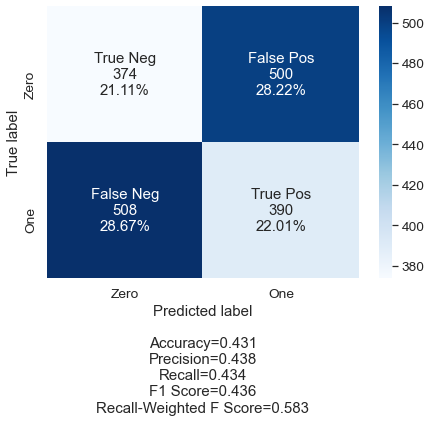

In [69]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Decision Tree

In [70]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5)

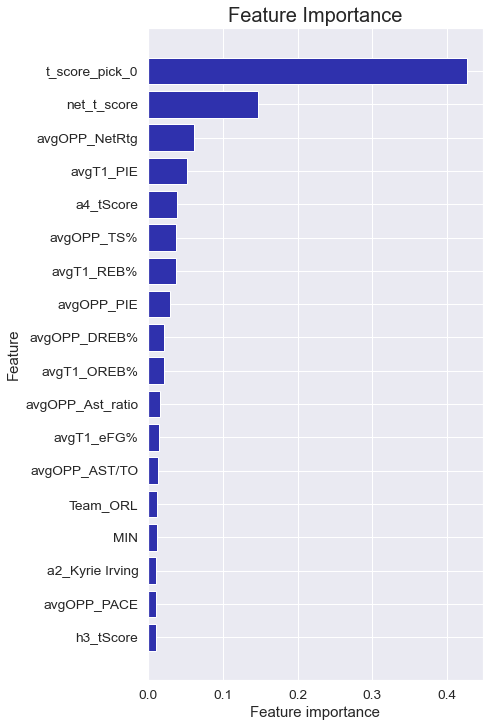

In [71]:
def plot_feature_importances(model):
    n_features = X_train_resampled.shape[1]
    imp_df = pd.DataFrame(model.feature_importances_)
    nm_df = pd.DataFrame(X_train_resampled.columns.values) 
    imp_feats = pd.merge(nm_df, imp_df, left_index=True, right_index=True)
    imp_feats= imp_feats.round(3)
    imp_feats= imp_feats.rename(columns = {'0_x' : 'Feature', '0_y' : 'Importance' })
    imp_feats = imp_feats.loc[imp_feats['Importance'] > .01]
    imp_feats = imp_feats.sort_values('Importance', ascending = True)
    n_features = imp_feats.shape[0]
    plt.figure(figsize=(6, 12))
    plt.barh(range(n_features), imp_feats['Importance'], align='center', color = bluez) 
    plt.yticks(np.arange(n_features), imp_feats['Feature'].values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance', fontsize = 20)

plot_feature_importances(tree_clf)

In [72]:
# Test set predictions
pred = tree_clf.predict(X_all_test)
cf_matrix = confusion_matrix(y_test, pred)

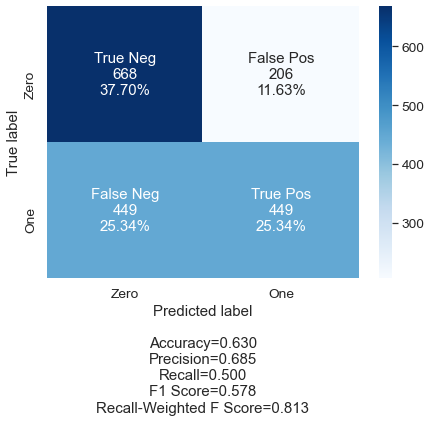

In [73]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [74]:
model_sum = update_results(cf_matrix, 'Decision Tree')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
1,Decision Tree,0.578,0.500,0.685,0.630


AUC: 0.6321510297482837


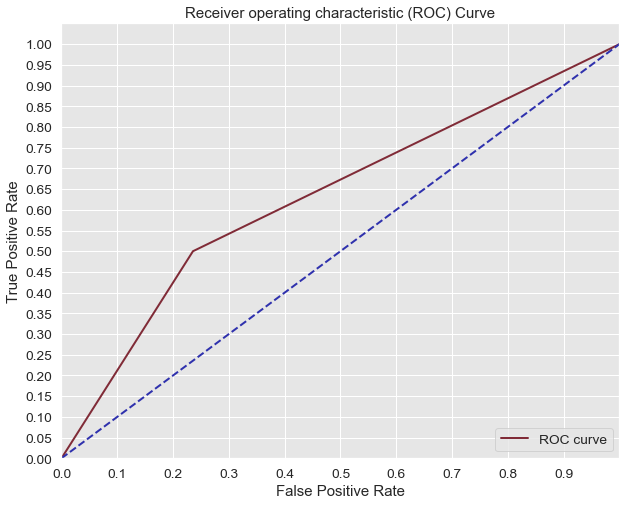

In [75]:
# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, pred)
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
print('AUC: {}'.format(auc(fpr, tpr)))                    # Print AUC
plt.figure(figsize=(10, 8))                               # Plot the ROC curve
lw = 2 
plt.plot(fpr, tpr, color=redz, 
            lw=lw, label='ROC curve') 
plt.plot([0, 1], [0, 1], color=bluez, lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)]) 
plt.xticks([i/10.0 for i in range(10)])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right') 
plt.show()

### RandomSearch

In [76]:
tree_clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [77]:
params = {'max_depth': np.arange(2,10,1),
           'min_samples_leaf': np.arange(0, 5, 1),
           'min_impurity_decrease': np.arange(0,2,.5),
           'ccp_alpha' : np.arange(0,3, 0.5),
           'criterion': ['gini', 'entropy']
}

rand_clf = RandomizedSearchCV(tree_clf,param_distributions=params, n_iter=30,scoring= class_metric)

rand_clf.fit(X_train_resampled, y_train_resampled)

c:\Users\tmcro\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\tmcro\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tmcro\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "c:\Users\tmcro\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 215, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\tmcro\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailed

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=5), n_iter=30,
                   param_distributions={'ccp_alpha': array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_impurity_decrease': array([0. , 0.5, 1. , 1.5]),
                                        'min_samples_leaf': array([0, 1, 2, 3, 4])},
                   scoring='accuracy')

In [78]:
rand_clf.best_params_

{'min_samples_leaf': 3,
 'min_impurity_decrease': 1.0,
 'max_depth': 7,
 'criterion': 'gini',
 'ccp_alpha': 1.5}

In [79]:
pred = rand_clf.predict(X_all_test)
cf_matrix = confusion_matrix(y_test, pred)

<ipython-input-61-c09135d2c92d>:46: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = cf[1,1] / sum(cf[:,1])


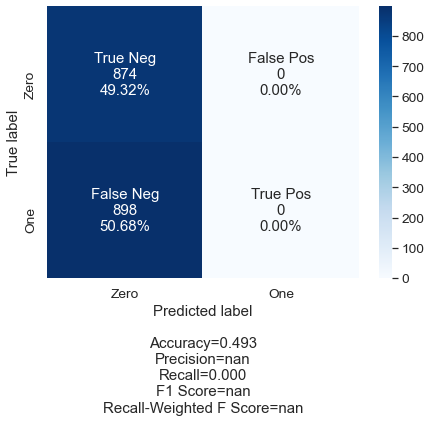

In [80]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [81]:
model_sum = update_results(cf_matrix, 'Decision Tree -- Random Search')
model_sum

<ipython-input-63-cd159ee2c771>:5: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = cf[1,1] / sum(cf[:,1])


,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
1,Decision Tree,0.578,0.500,0.685,0.630


## Random Forest Model

In [82]:
# fit a RandomForest
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5)

In [83]:
forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [84]:
# Training accuracy score
forest.score(X_train_resampled, y_train_resampled)
# Test accuracy score
forest.score(X_all_test, y_test).round(2)

0.62

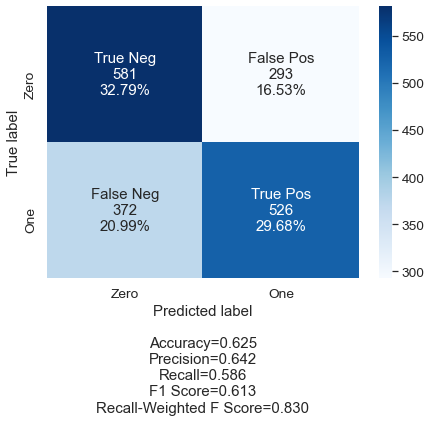

In [85]:

pred = forest.predict(X_all_test) 
cf_matrix = confusion_matrix(y_test, pred) 

#plot Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


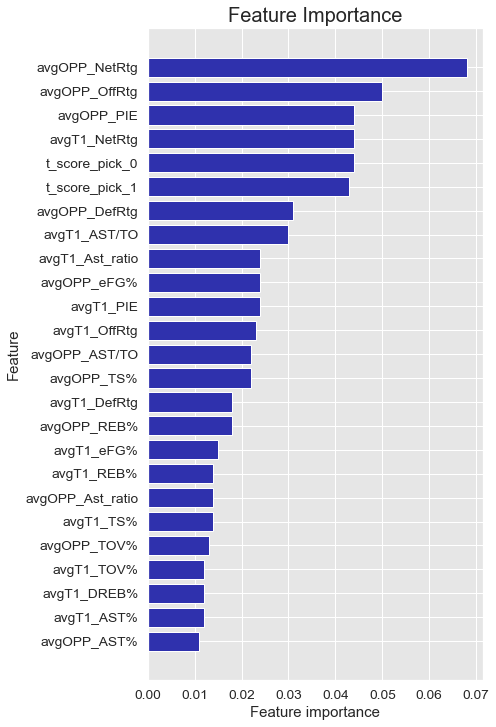

In [86]:
plot_feature_importances(forest)

In [87]:
model_sum = update_results(cf_matrix, 'Random Forest')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630


### GridSearchCV with Random Forest Model #1

In [88]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth' : [4,5,6],
}

In [89]:
# 12 minute runtime
CV_rfc = GridSearchCV(forest, param_grid=param_grid, cv= 5, scoring= class_metric)
CV_rfc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_depth': [4, 5, 6], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [90]:
CV_rfc.best_params_

{'max_depth': 5, 'n_estimators': 100}

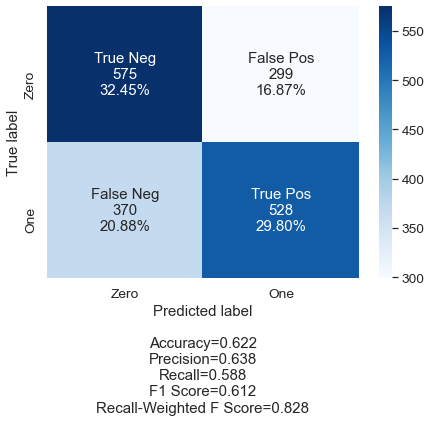

In [91]:
pred = CV_rfc.predict(X_all_test) 
cf_matrix = confusion_matrix(y_test, pred) 

#plot Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [92]:
model_sum = update_results(cf_matrix, 'Random Forest -- GridSearch')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630


### RandomizedSearchCV with Random Forest

In [93]:
rs_param = {'criterion' : ['gini', 'entropy'],
          'bootstrap':[True],
          'n_estimators': [50, 100, 150],
          'max_depth': [5, 6, 7, 8],
          'min_samples_leaf': [0, 1,2,3],
          'min_samples_split':[0, 2,4,6,8],
          }

In [94]:
# 25Min Runtime

r_search = RandomizedSearchCV(forest, n_jobs = -1, n_iter = 35, 
                                param_distributions = rs_param, 
                                scoring= class_metric)
r_search.fit(X_train_resampled, y_train_resampled)
r_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': True}

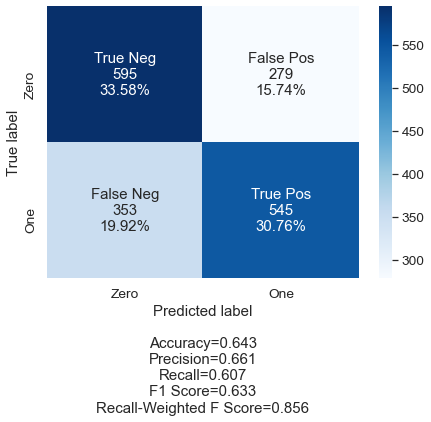

In [95]:
pred = r_search.predict(X_all_test) 
cf_matrix = confusion_matrix(y_test, pred) 

#plot Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [96]:
model_sum = update_results(cf_matrix, 'Random Forest -- RandomizedSearch')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
5,Random Forest -- RandomizedSearch,0.633,0.607,0.661,0.643


## XGBOOST Model

In [97]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
test_preds = clf.predict(X_all_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)


In [98]:
cf_matrix = confusion_matrix(y_test, test_preds)

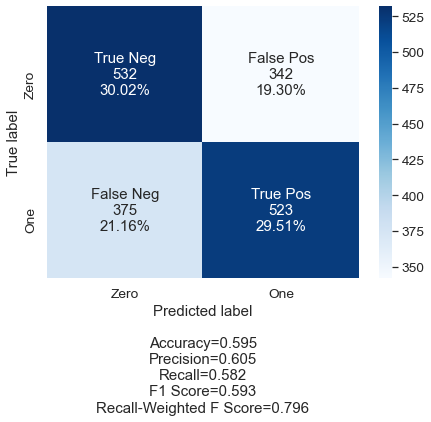

In [99]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [100]:
model_sum = update_results(cf_matrix, 'XGBoost')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
6,XGBoost,0.593,0.582,0.605,0.595
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
5,Random Forest -- RandomizedSearch,0.633,0.607,0.661,0.643


### Tune XGBoost

In [101]:
param_grid = {
    'max_depth': [3,4,5,6]
}

Grid Search found the following optimal parameters: 
max_depth: 3


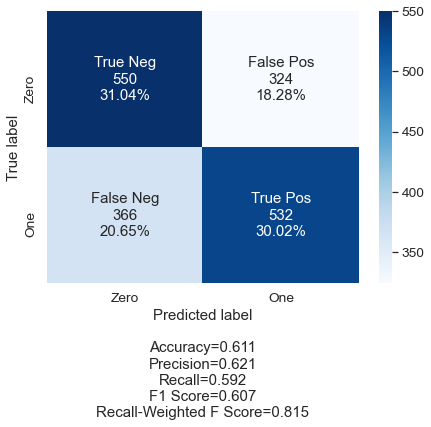

In [102]:
# Run XGBoost Model
grid_clf = GridSearchCV(clf, param_grid, scoring= class_metric, cv=None, n_jobs=1) 
grid_clf.fit(X_train_resampled, y_train_resampled)
best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_resampled)
test_preds = grid_clf.predict(X_all_test)
training_accuracy = accuracy_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

#Plot Confusion Matrix
cf_matrix = confusion_matrix(y_test, test_preds)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


In [103]:
best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
max_depth: 3


In [104]:
model_sum = update_results(cf_matrix, 'XGBoost GridSearch')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
6,XGBoost,0.593,0.582,0.605,0.595
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
5,Random Forest -- RandomizedSearch,0.633,0.607,0.661,0.643


### XGBoost Tuning Round 2
To continue to check scales

In [105]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [4,6],
    'min_child_weight': [1, 2],
    'subsample': [0.5],
}

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 4
min_child_weight: 2
subsample: 0.5


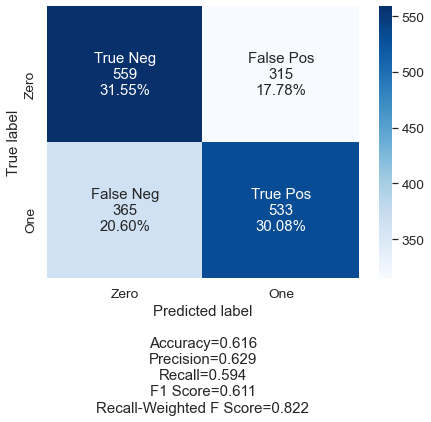

In [106]:
# 11 min runtime
grid_clf = GridSearchCV(clf, param_grid, scoring= class_metric, cv=None, n_jobs=1) #Using AUC to score
grid_clf.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_resampled)
test_preds = grid_clf.predict(X_all_test)
training_accuracy = accuracy_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

#Plot Confusion Matrix
cf_matrix = confusion_matrix(y_test, test_preds)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


In [107]:
model_sum = update_results(cf_matrix, 'XGBoost GridSearch_2')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
6,XGBoost,0.593,0.582,0.605,0.595
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
5,Random Forest -- RandomizedSearch,0.633,0.607,0.661,0.643


### XGBoost with Randomized Search

In [108]:
# 20 min runtime
params = { 'max_depth': [3, 4, 5, 6],
           'learning_rate': [ 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 0.7),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100],
           }

rand_clf = RandomizedSearchCV(clf,param_distributions=params, n_iter=25,scoring= class_metric)
rand_clf.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_paralle...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
          

Grid Search found the following optimal parameters: 
colsample_bylevel: 0.8999999999999999
colsample_bytree: 0.4
learning_rate: 0.1
max_depth: 3
n_estimators: 100
subsample: 0.5


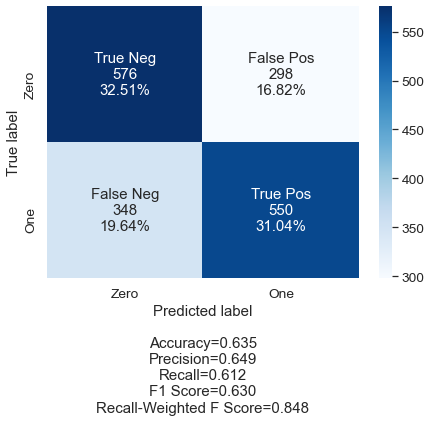

In [109]:
best_parameters = rand_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = rand_clf.predict(X_train_resampled)
test_preds = rand_clf.predict(X_all_test)

#Plot Confusion Matrix
cf_matrix = confusion_matrix(y_test, test_preds)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [110]:
model_sum = update_results(cf_matrix, 'XGBoost RandomizedSearch')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
6,XGBoost,0.593,0.582,0.605,0.595
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
9,XGBoost RandomizedSearch,0.630,0.612,0.649,0.635
5,Random Forest -- RandomizedSearch,0.633,0.607,0.661,0.643


## Bagged Trees (Ensemble)

In [111]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [112]:
# Fit to the training data
bagged_tree.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [113]:
pred = bagged_tree.predict(X_all_test)
cf_matrix = confusion_matrix(y_test, pred)

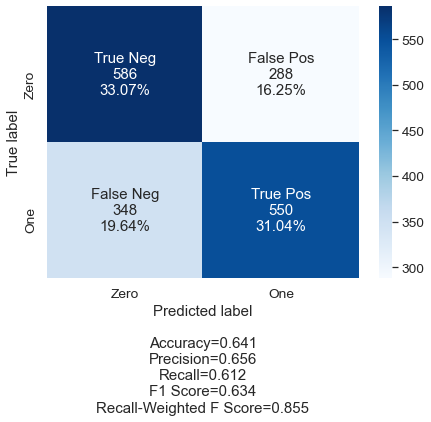

In [114]:
#  Plot the Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [115]:
model_sum = update_results(cf_matrix, 'Bagged Tree')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
6,XGBoost,0.593,0.582,0.605,0.595
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
9,XGBoost RandomizedSearch,0.630,0.612,0.649,0.635
10,Bagged Tree,0.634,0.612,0.656,0.641


### Bagged Trees with RandomSearchCV

In [151]:
bagged_tree2 = BaggingClassifier(DecisionTreeClassifier())

# bagged_tree2 = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                            #     n_estimators=20)

In [156]:
params = {'n_estimators': [10,20,30],
           'verbose': np.arange(0,1,1),
           }

BT_Rand = GridSearchCV(bagged_tree2,param_grid=params,
                            n_jobs= -1, scoring= class_metric)
BT_Rand.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30], 'verbose': array([0])},
             scoring='accuracy')

Grid Search found the following optimal parameters: 
n_estimators: 30
verbose: 0


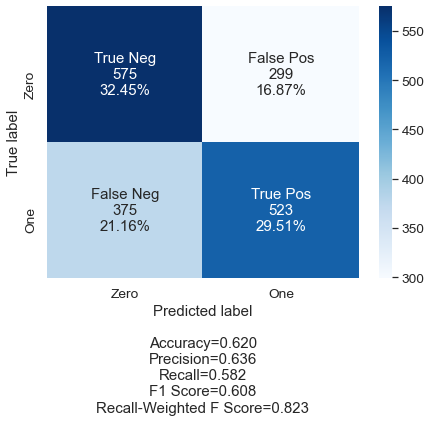

In [157]:
best_parameters = BT_Rand.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = BT_Rand.predict(X_train_resampled)
test_preds = BT_Rand.predict(X_all_test)

#Plot Confusion Matrix
cf_matrix = confusion_matrix(y_test, test_preds)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [159]:
model_sum = update_results(cf_matrix, 'Bagged Trees -- RandomizedSearch')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
13,KNN,0.537,0.531,0.543,0.536
6,XGBoost,0.593,0.582,0.605,0.595
14,SVC,0.598,0.577,0.621,0.607
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
15,Bagged Trees -- RandomizedSearch,0.608,0.582,0.636,0.620
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625


### Extra Trees

In [116]:
# fit
ExTrees = ExtraTreesClassifier(n_estimators=100, max_depth= 5)
ExTrees.fit(X_train_resampled, y_train_resampled)

ExtraTreesClassifier(max_depth=5)

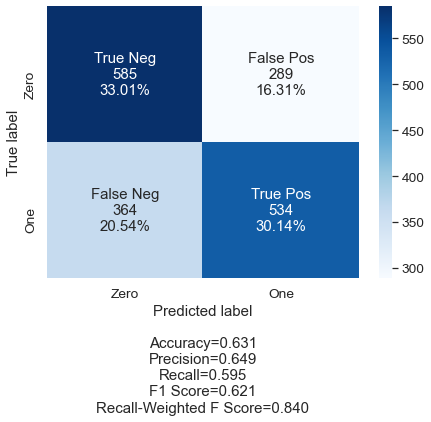

In [117]:
pred = ExTrees.predict(X_all_test) 
cf_matrix = confusion_matrix(y_test, pred) 

#plot Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [118]:
model_sum = update_results(cf_matrix, 'Extra Trees')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
6,XGBoost,0.593,0.582,0.605,0.595
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
11,Extra Trees,0.621,0.595,0.649,0.631
9,XGBoost RandomizedSearch,0.630,0.612,0.649,0.635


In [119]:
ExTrees.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Extra Trees with RandomSearchCV

In [120]:
params = { 'max_depth': [ 3, 4, 5, 6],
           'min_impurity_decrease': np.arange(0.0, 1.0, 0.2),
           'min_samples_leaf': np.arange(0, 4, 1),
           'min_samples_split': np.arange(0,6,1),
           'verbose': np.arange(0,3,1),
           'ccp_alpha': np.arange(0,4,1)
           }

ET_clf = RandomizedSearchCV(ExTrees,param_distributions=params,n_jobs= -1, n_iter=50, scoring= class_metric)
ET_clf.fit(X_train_resampled, y_train_resampled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(estimator=ExtraTreesClassifier(max_depth=5), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0, 1, 2, 3]),
                                        'max_depth': [3, 4, 5, 6],
                                        'min_impurity_decrease': array([0. , 0.2, 0.4, 0.6, 0.8]),
                                        'min_samples_leaf': array([0, 1, 2, 3]),
                                        'min_samples_split': array([0, 1, 2, 3, 4, 5]),
                                        'verbose': array([0, 1, 2])},
                   scoring='accuracy')

Grid Search found the following optimal parameters: 
ccp_alpha: 0
max_depth: 5
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
verbose: 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


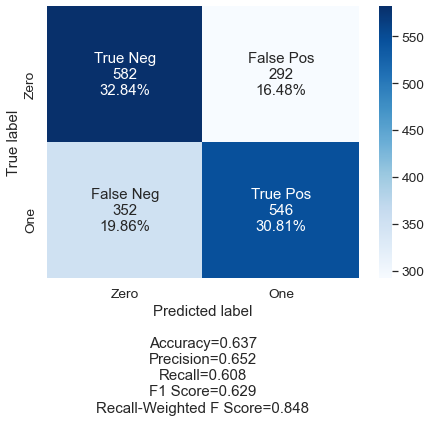

In [121]:
best_parameters = ET_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = ET_clf.predict(X_train_resampled)
test_preds = ET_clf.predict(X_all_test)

#Plot Confusion Matrix
cf_matrix = confusion_matrix(y_test, test_preds)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [122]:
model_sum = update_results(cf_matrix, 'Extra Trees -- RandomizedSearch')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
6,XGBoost,0.593,0.582,0.605,0.595
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
11,Extra Trees,0.621,0.595,0.649,0.631
9,XGBoost RandomizedSearch,0.630,0.612,0.649,0.635


## KNN

In [123]:
# Running takes 9 minutes
knclf = KNeighborsClassifier()

# Fit 
knclf.fit(X_train_resampled, y_train_resampled)

# Predict
test_preds = knclf.predict(X_all_test)

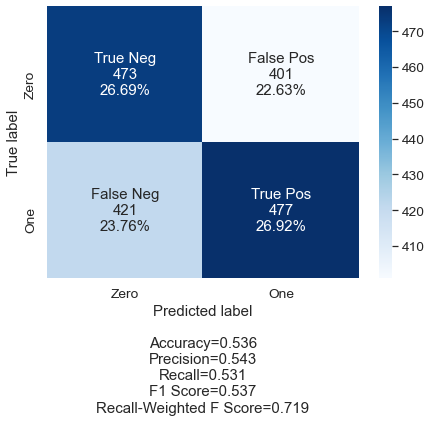

In [124]:
cf_matrix = confusion_matrix(y_test, test_preds)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [125]:
model_sum = update_results(cf_matrix, 'KNN')
model_sum


,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
13,KNN,0.537,0.531,0.543,0.536
6,XGBoost,0.593,0.582,0.605,0.595
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630
11,Extra Trees,0.621,0.595,0.649,0.631


## SVC (Support Vector Classification)

In [126]:
from sklearn.svm import SVC

In [127]:

svclf = SVC()

# Fit 
svclf.fit(X_train_resampled, y_train_resampled)

# Predict
test_preds = svclf.predict(X_all_test)

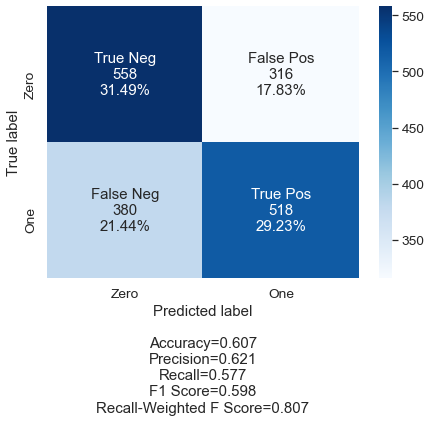

In [128]:
cf_matrix = confusion_matrix(y_test, test_preds)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [129]:
model_sum = update_results(cf_matrix, 'SVC')
model_sum

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.436,0.434,0.438,0.431
2,Decision Tree -- Random Search,NaN,0.000,NaN,0.493
13,KNN,0.537,0.531,0.543,0.536
6,XGBoost,0.593,0.582,0.605,0.595
14,SVC,0.598,0.577,0.621,0.607
7,XGBoost GridSearch,0.607,0.592,0.621,0.611
8,XGBoost GridSearch_2,0.611,0.594,0.629,0.616
4,Random Forest -- GridSearch,0.612,0.588,0.638,0.622
3,Random Forest,0.613,0.586,0.642,0.625
1,Decision Tree,0.578,0.500,0.685,0.630


## Results

## Conclusion